In [1]:
import pandas as pd
import math

In [93]:
#분석 데이터 불러오기
#분석은 의령군 / 산청군 생활인구, 접근성, 문화공간 현황 분석

per23 = pd.read_csv('23년도 경남 생활인구 데이터.csv', encoding='utf-8')

move23 = pd.read_csv('23년도 경남 접근성 데이터 셋.csv', sep= '\t',encoding='cp949')

In [94]:
per23 = per23[per23['시군구명'].isin(['의령군','산청군','김해시'])]
move23 = move23[move23['시군구명'].isin(['의령군','산청군','김해시'])]

In [95]:
men_cnt23 = [int(col.replace(',','')) for col in per23['남']]
w_cnt23 = [int(col.replace(',','')) for col in per23['여']]
per23['남'] = men_cnt23
per23['여'] = w_cnt23

In [96]:
per23

,시군구명,접근성 변수명,남,여
0,김해시,세대인구_외국인,15585,5840
1,김해시,세대인구_성별,269755,263904
2,김해시,거주인구_총인구,285340,269744
3,김해시,연령별_10대미만 인구,20507,19172
4,김해시,연령별_10대인구,30468,28953
5,김해시,연령별_20대인구,33048,27032
6,김해시,연령별_30대인구,33134,30200
7,김해시,연령별_40대인구,45884,45920
8,김해시,연령별_50대인구,51694,51022
9,김해시,연령별_60대인구,36598,34544


In [100]:
김해인구 = per23[per23['시군구명']=='김해시']
김해인구 

김해연령별 = 김해인구.iloc[3:]
김해연령별['합계'] = 김해연령별[['남','여']].sum(axis = 1)

김해연령별

C:\Users\user\AppData\Local\Temp\ipykernel_4844\3329055310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  김해연령별['합계'] = 김해연령별[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
3,김해시,연령별_10대미만 인구,20507,19172,39679
4,김해시,연령별_10대인구,30468,28953,59421
5,김해시,연령별_20대인구,33048,27032,60080
6,김해시,연령별_30대인구,33134,30200,63334
7,김해시,연령별_40대인구,45884,45920,91804
8,김해시,연령별_50대인구,51694,51022,102716
9,김해시,연령별_60대인구,36598,34544,71142
10,김해시,연령별_70대인구,13573,16304,29877
11,김해시,연령별_80대인구,4515,9302,13817
12,김해시,연령별_90대인구,330,1424,1754


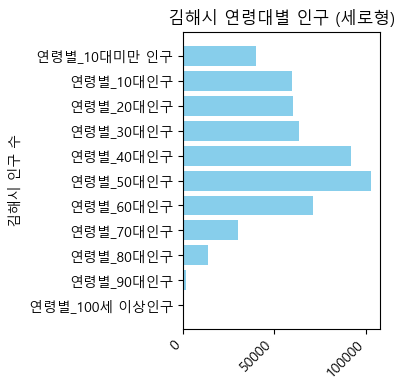

In [102]:
import matplotlib.pyplot as plt

# 연령대와 해당 인구 데이터
age_labels = [
    "연령별_10대미만 인구", "연령별_10대인구", "연령별_20대인구",
    "연령별_30대인구", "연령별_40대인구", "연령별_50대인구",
    "연령별_60대인구", "연령별_70대인구", "연령별_80대인구",
    "연령별_90대인구", "연령별_100세 이상인구"  # 가장 마지막에 위치
]

population = [39679, 59421, 60080,63334, 91804, 102716, 71142,29877, 13817,1754, 35]

age_labels = age_labels[::-1]
population = population[::-1]
plt.figure(figsize=(4,4))

# 세로형 막대그래프
plt.barh(age_labels, population, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("김해시 연령대별 인구 (세로형)")
plt.ylabel("김해시 인구 수")
plt.tight_layout()
plt.show()


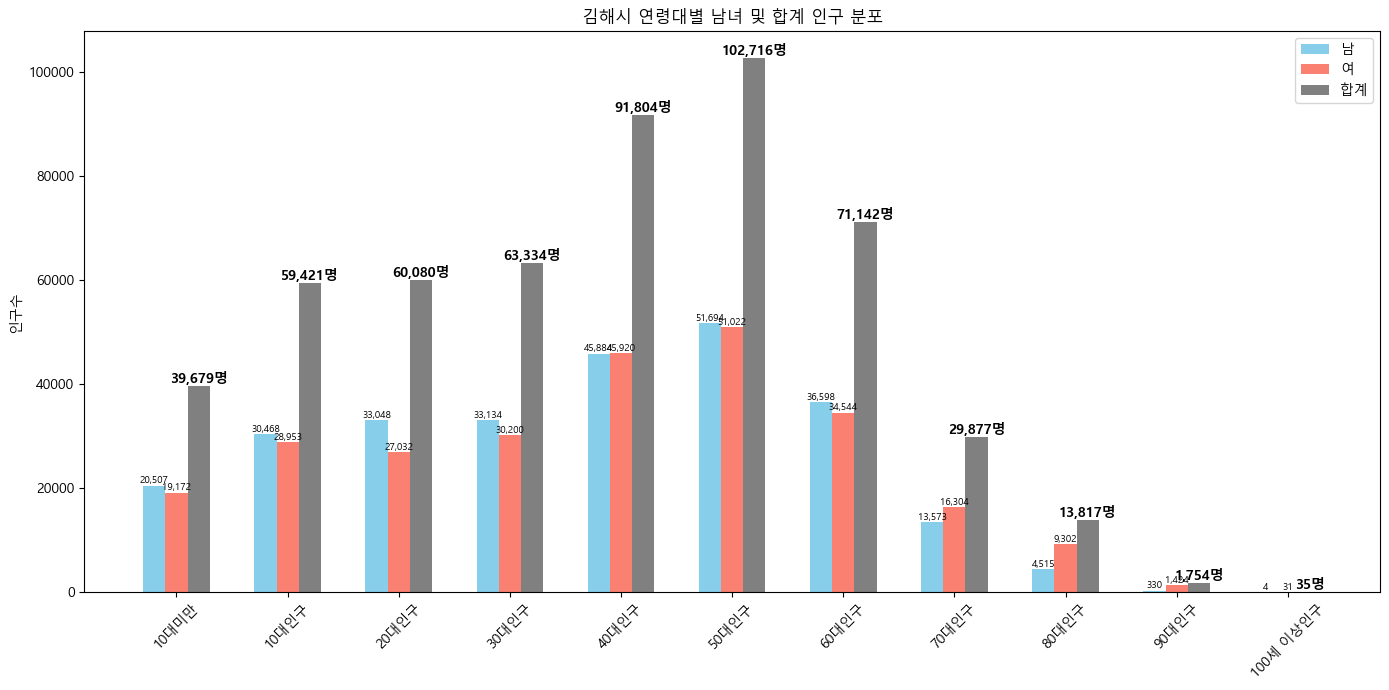

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 김해연령별["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 김해연령별["남"]
women = 김해연령별["여"]
total = 김해연령별["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("김해시 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


In [81]:
#의령 / 산청 데이터나누기

의령인구23 = per23[per23['시군구명']=='의령군']
의령인구23

산청인구23 = per23[per23['시군구명']=='산청군']
산청인구23

의령인구23

,시군구명,접근성 변수명,남,여
28,의령군,세대인구_외국인,625,259
29,의령군,세대인구_성별,12668,12807
30,의령군,거주인구_총인구,13293,13066
31,의령군,연령별_10대미만 인구,459,13034
32,의령군,연령별_10대인구,719,629
33,의령군,연령별_20대인구,881,580
34,의령군,연령별_30대인구,787,713
35,의령군,연령별_40대인구,1365,1056
36,의령군,연령별_50대인구,2405,1884
37,의령군,연령별_60대인구,3294,2803


In [45]:
의령거주인구23 = 의령인구23.iloc[0:3]

의령거주인구23['합계'] = 의령거주인구23[['남','여']].sum(axis = 1)
의령거주인구23


의령연령별23 = 의령인구23.iloc[3:]
의령연령별23['합계'] = 의령연령별23[['남','여']].sum(axis= 1)
의령연령별23

C:\Users\user\AppData\Local\Temp\ipykernel_4844\2780774168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령거주인구23['합계'] = 의령거주인구23[['남','여']].sum(axis = 1)
C:\Users\user\AppData\Local\Temp\ipykernel_4844\2780774168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령연령별23['합계'] = 의령연령별23[['남','여']].sum(axis= 1)


,시군구명,접근성 변수명,남,여,합계
31,의령군,연령별_10대미만 인구,459,13034,13493
32,의령군,연령별_10대인구,719,629,1348
33,의령군,연령별_20대인구,881,580,1461
34,의령군,연령별_30대인구,787,713,1500
35,의령군,연령별_40대인구,1365,1056,2421
36,의령군,연령별_50대인구,2405,1884,4289
37,의령군,연령별_60대인구,3294,2803,6097
38,의령군,연령별_70대인구,1750,2065,3815
39,의령군,연령별_80대인구,897,2228,3125
40,의령군,연령별_90대인구,106,458,564


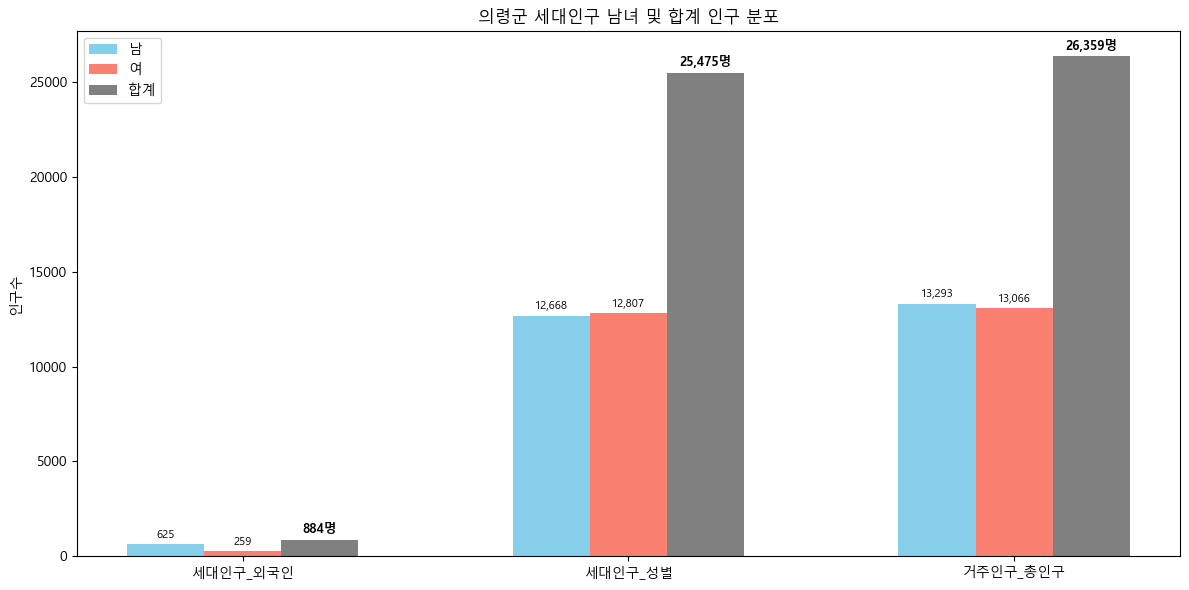

In [82]:
#의령군 23년도 거주인구 분석

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 의령거주인구23['접근성 변수명']
men = 의령거주인구23['남']
women = 의령거주인구23['여']
total = 의령거주인구23['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("의령군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


In [46]:
의령연령별23

,시군구명,접근성 변수명,남,여,합계
31,의령군,연령별_10대미만 인구,459,13034,13493
32,의령군,연령별_10대인구,719,629,1348
33,의령군,연령별_20대인구,881,580,1461
34,의령군,연령별_30대인구,787,713,1500
35,의령군,연령별_40대인구,1365,1056,2421
36,의령군,연령별_50대인구,2405,1884,4289
37,의령군,연령별_60대인구,3294,2803,6097
38,의령군,연령별_70대인구,1750,2065,3815
39,의령군,연령별_80대인구,897,2228,3125
40,의령군,연령별_90대인구,106,458,564


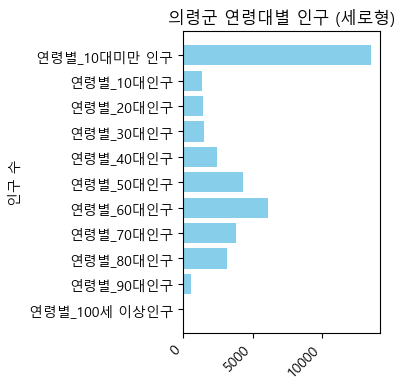

In [72]:
import matplotlib.pyplot as plt

# 연령대와 해당 인구 데이터
age_labels = [
    "연령별_10대미만 인구", "연령별_10대인구", "연령별_20대인구",
    "연령별_30대인구", "연령별_40대인구", "연령별_50대인구",
    "연령별_60대인구", "연령별_70대인구", "연령별_80대인구",
    "연령별_90대인구", "연령별_100세 이상인구"  # 가장 마지막에 위치
]

population = [13493, 1348, 1461, 1500, 2421, 4289, 6097, 3815, 3125, 564, 17]

age_labels = age_labels[::-1]
population = population[::-1]
plt.figure(figsize=(4,4))

# 세로형 막대그래프
plt.barh(age_labels, population, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("의령군 연령대별 인구 (세로형)")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()


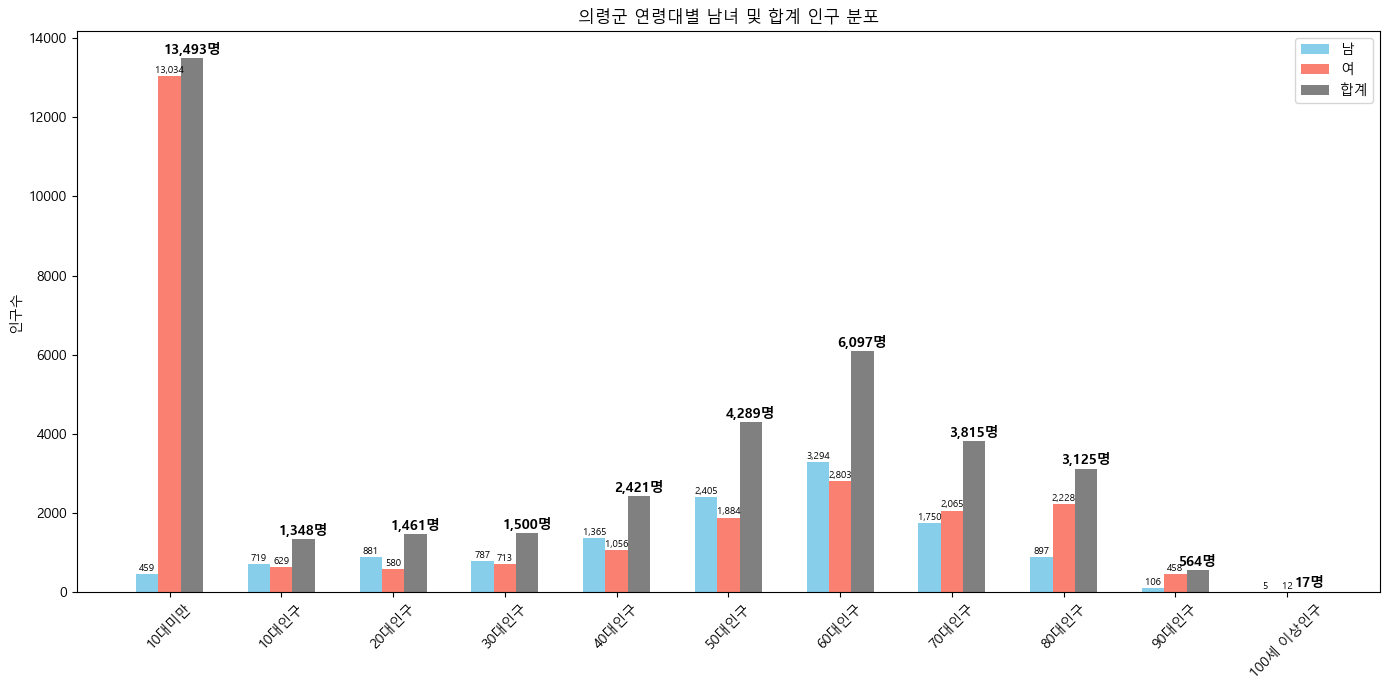

의령군 총인구 수 : 38,130명


In [10]:
#의령군 22년도 생활인구 분석
#의령군 연령대별 인구

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 의령연령별23["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 의령연령별23["남"]
women = 의령연령별23["여"]
total = 의령연령별23["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("의령군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


print(f'의령군 총인구 수 : {의령연령별23['합계'].sum():,}명')

In [87]:
산청인구23

산청연령별23 = 산청인구23.iloc[3:]
산청연령별23['합계'] = 산청연령별23[['남','여']].sum(axis = 1)

산청연령별23

C:\Users\user\AppData\Local\Temp\ipykernel_4844\741190953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청연령별23['합계'] = 산청연령별23[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
45,산청군,연령별_10대미만 인구,965,467,1432
46,산청군,연령별_10대인구,1031,864,1895
47,산청군,연령별_20대인구,1151,829,1980
48,산청군,연령별_30대인구,966,783,1749
49,산청군,연령별_40대인구,1597,1355,2952
50,산청군,연령별_50대인구,3339,2740,6079
51,산청군,연령별_60대인구,4330,3904,8234
52,산청군,연령별_70대인구,2520,2740,5260
53,산청군,연령별_80대인구,1216,2734,3950
54,산청군,연령별_90대인구,108,563,671


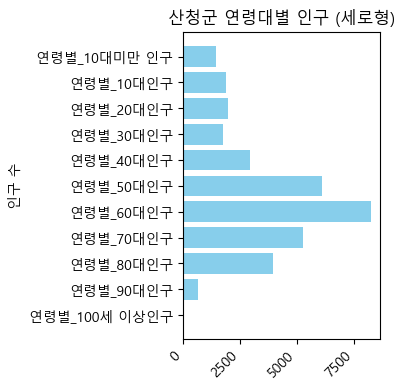

In [88]:
import matplotlib.pyplot as plt

# 연령대와 해당 인구 데이터
age_labels = [
    "연령별_10대미만 인구", "연령별_10대인구", "연령별_20대인구",
    "연령별_30대인구", "연령별_40대인구", "연령별_50대인구",
    "연령별_60대인구", "연령별_70대인구", "연령별_80대인구",
    "연령별_90대인구", "연령별_100세 이상인구"  # 가장 마지막에 위치
]

population = [1432, 1895, 1980, 1749, 2952, 6079, 8234, 5260, 3950, 671, 17]

age_labels = age_labels[::-1]
population = population[::-1]
plt.figure(figsize=(4,4))

# 세로형 막대그래프
plt.barh(age_labels, population, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("산청군 연령대별 인구 (세로형)")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()


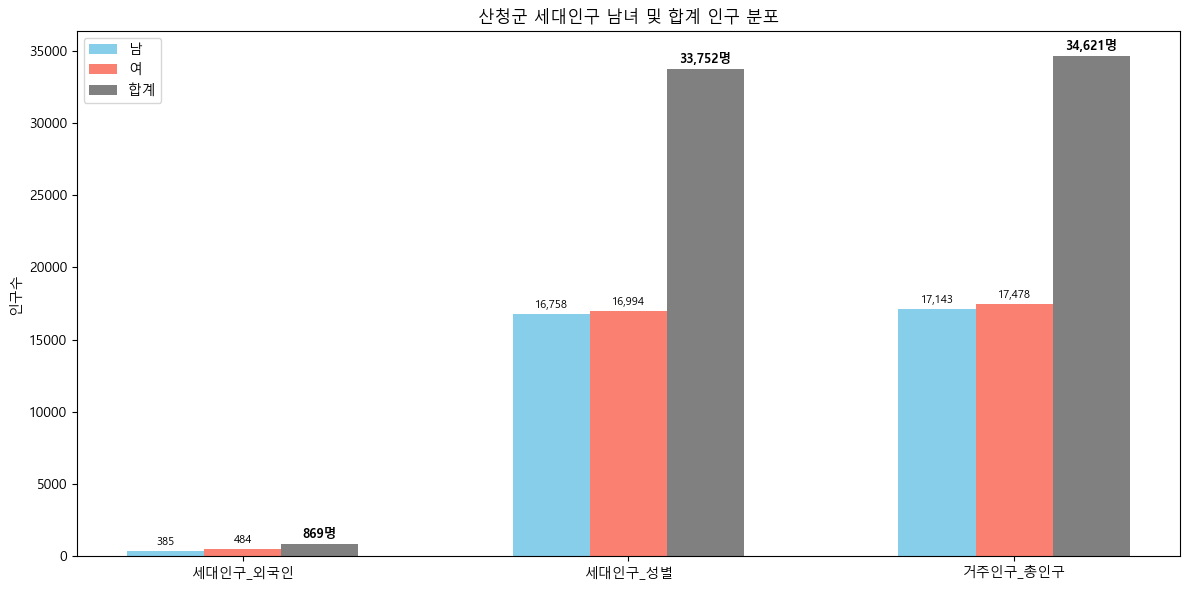

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 산청거주인구23['접근성 변수명']
men = 산청거주인구23['남']
women = 산청거주인구23['여']
total = 산청거주인구23['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("산청군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

In [80]:
산청인구23['합계'] = 산청인구23[['남','여']].sum(axis = 1)
산청인구23 = 산청인구23.iloc[1:]

산청인구23

,시군구명,접근성 변수명,남,여,합계
49,산청군,연령별_40대인구,1597,1355,2952
50,산청군,연령별_50대인구,3339,2740,6079
51,산청군,연령별_60대인구,4330,3904,8234
52,산청군,연령별_70대인구,2520,2740,5260
53,산청군,연령별_80대인구,1216,2734,3950
54,산청군,연령별_90대인구,108,563,671
55,산청군,연령별_100세 이상인구,2,15,17


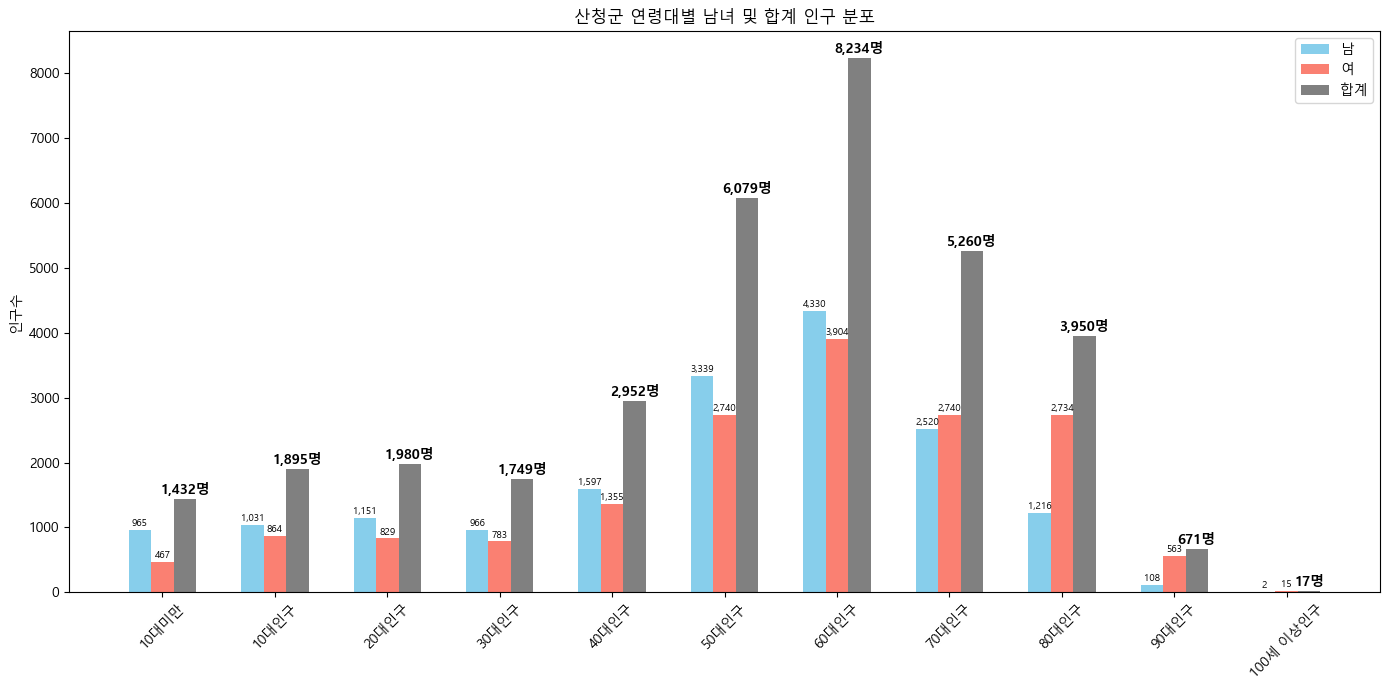

산청군 총인구 수 : 34,219명


In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 산청연령별23["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 산청연령별23["남"]
women = 산청연령별23["여"]
total = 산청연령별23["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("산청군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

print(f'산청군 총인구 수 : {산청연령별23['합계'].sum():,}명')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 산청연령별23["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 산청연령별23["남"]
women = 산청연령별23["여"]
total = 산청연령별23["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("산청군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


In [103]:
#접근성 현황분석

move23

,시군구명,접근성 변수명,위도,경도
3776,김해시,버스정류장_장방입구,35.328000,128.778200
3777,김해시,버스정류장_진말,35.332260,128.784100
3778,김해시,버스정류장_내오서-미사용,35.336130,128.815300
3779,김해시,버스정류장_외오서,35.332610,128.820000
3780,김해시,버스정류장_금곡마을,35.343950,128.820300
...,...,...,...,...
6920,김해시,지하철_부산김해경전철 수로왕릉,35.232822,128.872141
6921,김해시,지하철_부산김해경전철 연지공원,35.249658,128.869291
6922,김해시,지하철_부산김해경전철 인제대,35.228099,128.901736
6923,김해시,지하철_부산김해경전철 장신대,35.259556,128.867114


In [105]:
산청23 = move23[move23['시군구명']=='산청군']

의령23 = move23[move23['시군구명']=='의령군']

김해23 = move23[move23['시군구명']=='김해시']

print(move23['시군구명'].value_counts())

시군구명
김해시    2814
의령군     153
산청군     152
Name: count, dtype: int64


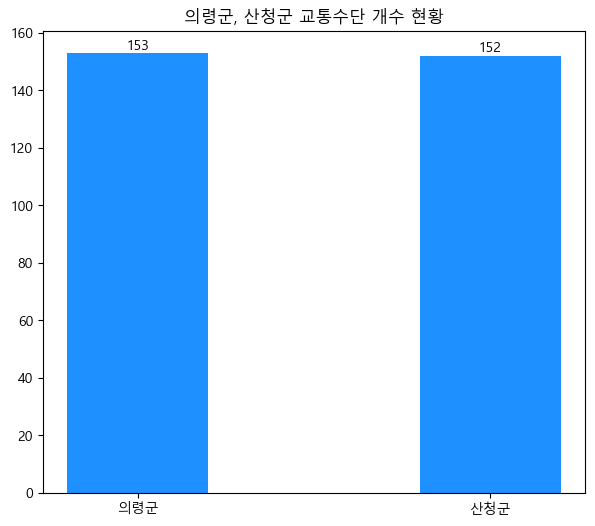

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,6))
plt.rcParams['font.family']= 'Malgun Gothic'

x = ['의령군','산청군']
y = [153, 152]

plt.bar(x,y,color= 'dodgerblue', width = 0.4)

plt.text(0,154,str(153), ha = 'center', fontsize = 10)
plt.text(1, 153.5, str(152), ha = 'center', fontsize = 10)

plt.title('의령군, 산청군 교통수단 개수 현황')
plt.show()

In [20]:
li = 의령23['접근성 변수명'].to_list()

종류 = []
주소 = []

for i in li:
    i_split = i.split('_')
    종류.append(i_split[0])
    주소.append(i_split[1])


의령23['종류'] = 종류
의령23['주소'] = 주소

의령23 = 의령23.drop('접근성 변수명', axis = 1)

의령23

print(의령23['종류'].value_counts())

종류
주차장      96
버스정류장    57
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13756\2722470052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령23['종류'] = 종류
C:\Users\user\AppData\Local\Temp\ipykernel_13756\2722470052.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령23['주소'] = 주소


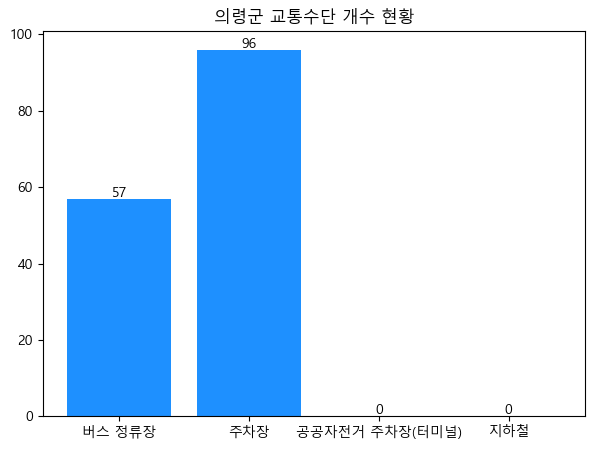

의령군 교통수단 총 개수 : 153


In [108]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [57, 96, 0, 0]

plt.bar(x,y, color = 'dodgerblue')

plt.text(0,57.5,str(57), ha = 'center', fontsize = 10)
plt.text(1, 96.5, str(96), ha = 'center', fontsize = 10)
plt.text(2, 0.5, str(0), ha = 'center', fontsize = 10)
plt.text(3, 0.5, str(0), ha = 'center', fontsize = 10)

plt.title('의령군 교통수단 개수 현황')
plt.show()

print(f'의령군 교통수단 총 개수 : {sum(y)}')

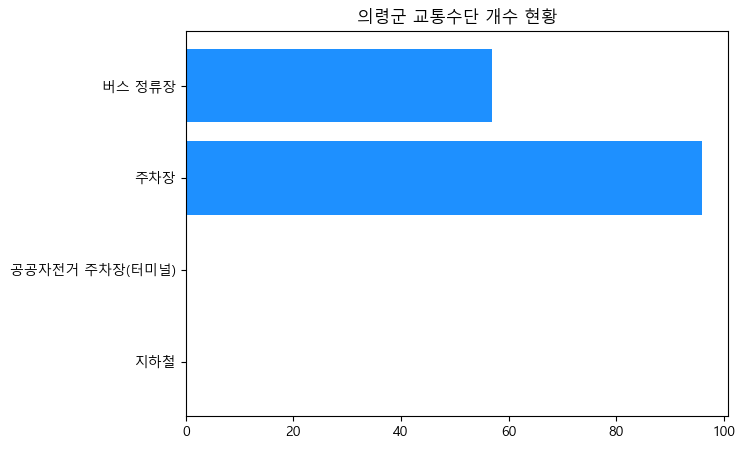

의령군 교통수단 총 개수 : 153


In [112]:

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [57, 96, 0, 0]


x = x[::-1]
y = y[::-1]

plt.barh(x,y, color = 'dodgerblue')


plt.title('의령군 교통수단 개수 현황')
plt.show()

print(f'의령군 교통수단 총 개수 : {sum(y)}')


In [22]:
산청23


li = 산청23['접근성 변수명'].to_list()

종류 = []
주소 = []

for i in li:
    i_split = i.split('_')
    종류.append(i_split[0])
    주소.append(i_split[1])


산청23['종류'] = 종류
산청23['주소'] = 주소

산청23 = 산청23.drop('접근성 변수명', axis = 1)

산청23

print(산청23['종류'].value_counts())

종류
버스정류장    130
주차장       22
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13756\1542983545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청23['종류'] = 종류
C:\Users\user\AppData\Local\Temp\ipykernel_13756\1542983545.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청23['주소'] = 주소


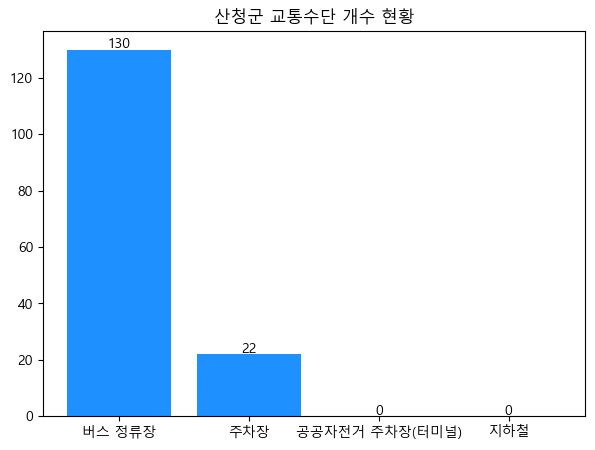

산청군 교통수단 총 개수 : 152


In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [130, 22, 0, 0]

plt.bar(x,y, color = 'dodgerblue')

plt.text(0,130.5,str(130), ha = 'center', fontsize = 10)
plt.text(1, 22.5, str(22), ha = 'center', fontsize = 10)
plt.text(2, 0.5, str(0), ha = 'center', fontsize = 10)
plt.text(3, 0.5, str(0), ha = 'center', fontsize = 10)

plt.title('산청군 교통수단 개수 현황')
plt.show()

print(f'산청군 교통수단 총 개수 : {sum(y)}')

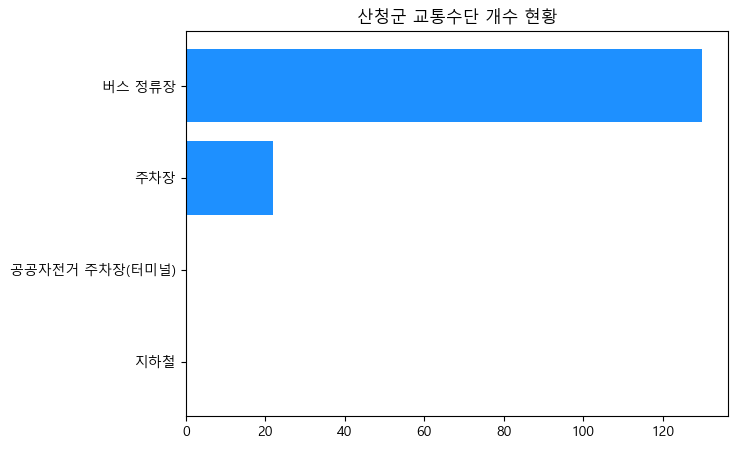

산청군 교통수단 총 개수 : 152


In [113]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [130, 22, 0, 0]


x = x[::-1]
y = y[::-1]

plt.barh(x,y, color = 'dodgerblue')


plt.title('산청군 교통수단 개수 현황')
plt.show()

print(f'산청군 교통수단 총 개수 : {sum(y)}')

In [117]:
li = 김해23['접근성 변수명'].to_list()

종류 = []
주소 = []

for i in li:
    i_split = i.split('_')
    종류.append(i_split[0])
    주소.append(i_split[1])


김해23['종류'] = 종류
김해23['주소'] = 주소

김해23= 김해23.drop('접근성 변수명', axis = 1)

김해23

print(김해23['종류'].value_counts())

종류
버스정류장     2521
자전저정류장     187
주차장         94
지하철         12
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_4844\2257463608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  김해23['종류'] = 종류
C:\Users\user\AppData\Local\Temp\ipykernel_4844\2257463608.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  김해23['주소'] = 주소


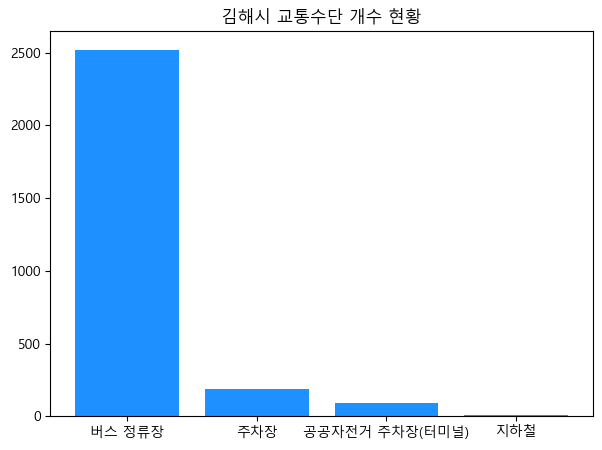

김해시 교통수단 총 개수 : 2814


In [120]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [2521, 187, 94,  12]

plt.bar(x,y, color = 'dodgerblue')


plt.title('김해시 교통수단 개수 현황')
plt.show()

print(f'김해시 교통수단 총 개수 : {sum(y)}')

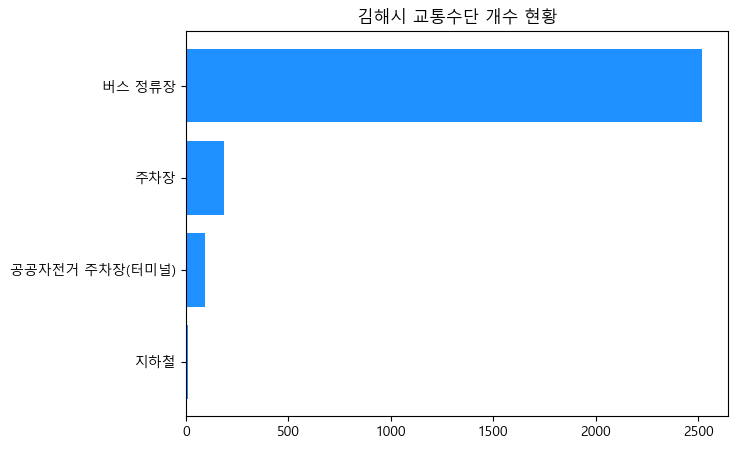

김해시 교통수단 총 개수 : 2814


In [122]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(7,5))

x = ['버스 정류장', '주차장', '공공자전거 주차장(터미널)', '지하철']
y = [2521, 187, 94,  12]


x = x[::-1]
y = y[::-1]

plt.barh(x,y, color = 'dodgerblue')


plt.title('김해시 교통수단 개수 현황')
plt.show()

print(f'김해시 교통수단 총 개수 : {sum(y)}')

In [123]:
cul = pd.read_csv('geocoding_culture_data.csv',encoding = 'utf-8')

cul

,Unnamed: 0,시군구,소재지,Latitude,Longitude,구분
0,2,산청군,산청군 금서면 친환경로2631번길 12,35.420126,127.872855,문화예술회관
1,7,의령군,의령군 의령읍 의병로24길 31-1,35.317694,128.264840,문화예술회관
2,10,김해시,김해시 김해대로 2062 (내동),35.242477,128.863187,문화예술회관
3,13,창원시,창원시 진해구 진해대로 325 (태백동),35.169833,128.666084,문화예술회관
4,14,창원시,창원시 마산회원구 삼호로 135,35.225855,128.577258,문화예술회관
...,...,...,...,...,...,...
142,7,창원시,창원시 진해구 중원로 1,35.144006,128.658285,박물관
143,17,창원시,창원시 진해구 중원동로 52 (제황산동),35.148911,128.663991,박물관
144,20,김해시,김해시 인제로 197 (어방동),35.250387,128.901177,박물관
145,21,창원시,창원시 의창구 퇴촌로 92 (퇴촌동),35.250146,128.696122,박물관


In [124]:
groups = cul.groupby('시군구')['구분']

for i,j in groups:
    print(f'{i}의 문화시설 개수 : {len(j)}')

김해시의 문화시설 개수 : 57
산청군의 문화시설 개수 : 8
의령군의 문화시설 개수 : 3
창원시의 문화시설 개수 : 79


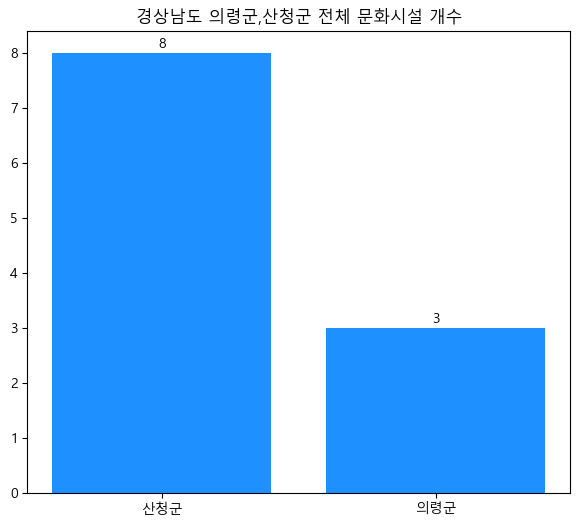

In [127]:
#시군구별 문화시설 개수 현황그래프

import matplotlib.pyplot as plt

plt.figure(figsize = (7,6))
plt.rcParams['font.family'] = 'Malgun gothic'

x = ['산청군', '의령군']
y = [8, 3]

plt.bar(x,y, color= 'dodgerblue')


plt.text(0, 8.1, str(8), ha = 'center', fontsize = 10)
plt.text(1, 3.1, str(3), ha = 'center', fontsize = 10)

plt.title('경상남도 의령군,산청군 전체 문화시설 개수')


plt.show()

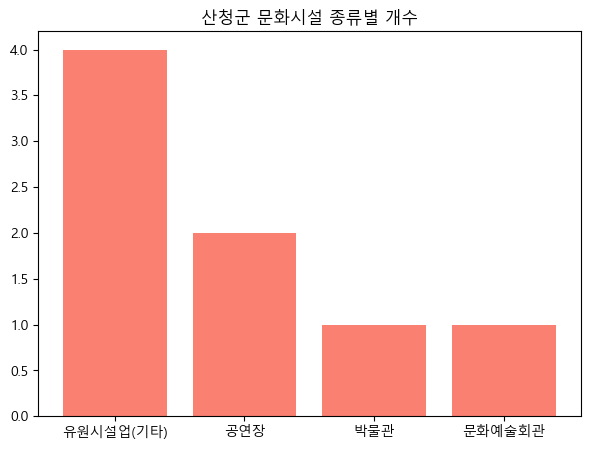

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.rcParams['font.family'] = 'Malgun gothic'

x = ['유원시설업(기타)','공연장','박물관','문화예술회관']
y = [4,2,1,1]


plt.bar(x, y, color='salmon')

# # 값 텍스트 (색상 맞춤)
# for i, val in enumerate(y):
#     plt.text(i, val + 0.1, str(val), ha='center', fontsize=10, color=colors[i])

plt.title('산청군 문화시설 종류별 개수')

plt.show()

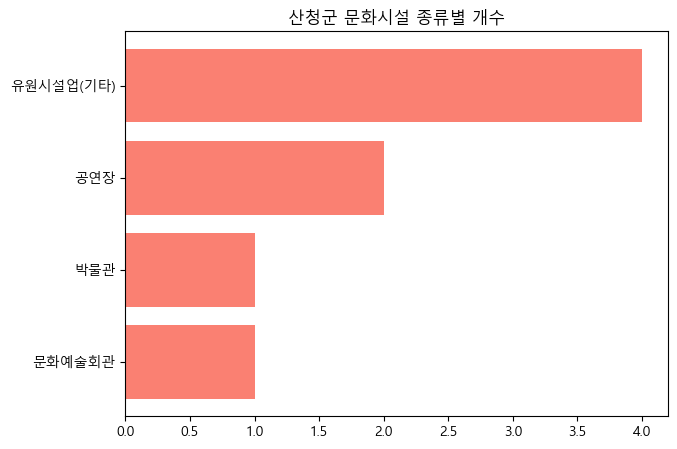

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.rcParams['font.family'] = 'Malgun gothic'

x = ['유원시설업(기타)','공연장','박물관','문화예술회관']
y = [4,2,1,1]

x = x[::-1]
y = y[::-1]




plt.barh(x, y, color='salmon')

# # 값 텍스트 (색상 맞춤)
# for i, val in enumerate(y):
#     plt.text(i, val + 0.1, str(val), ha='center', fontsize=10, color=colors[i])

plt.title('산청군 문화시설 종류별 개수')

plt.show()

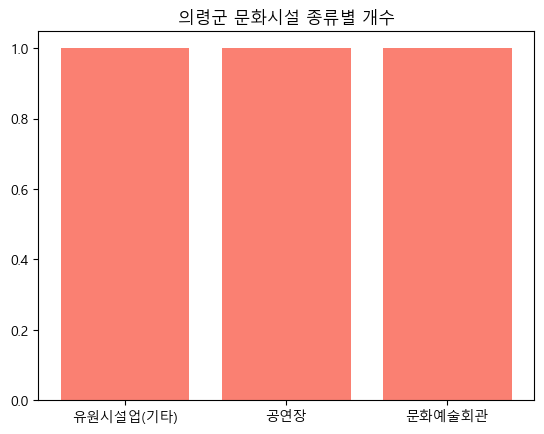

In [138]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun gothic'

x = ['유원시설업(기타)','공연장','문화예술회관']
y = [1,1,1]


plt.bar(x, y, color='salmon')

# 막대 위에 값 표시 (텍스트도 각각 같은 색상으로 맞춤)
# for i, val in enumerate(y):
#     plt.text(i, val + 0.05, str(val), ha='center', fontsize=10, color=colors[i])

plt.title('의령군 문화시설 종류별 개수')

plt.show()

In [56]:
의령문화시설 = cul[cul['시군구']=='의령군']

의령문화시설

,Unnamed: 0,시군구,소재지,Latitude,Longitude,구분
1,7,의령군,의령군 의령읍 의병로24길 31-1,35.317694,128.264840,문화예술회관
20,36,의령군,경상남도 의령군 의령읍 동동리 877-24번지,35.318236,128.265268,공연장
67,89,의령군,경상남도 의령군 의령읍 서동리 484-5번지,35.319838,128.260192,유원시설업(기타)


In [ ]:
#문화공간별 접근성 알이보기

In [43]:
!pip install folium

  Using cached folium-0.19.6-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.19.6-py2.py3-none-any.whl (112 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
import folium

#의령군지도 불러오기
m = folium.Map(location = [35.3221896, 128.261658],
            zoom_start = 15,
              titles = 'Stamen Terrain')

m

In [104]:
의령문화시설

,Unnamed: 0,시군구,소재지,Latitude,Longitude,구분
1,7,의령군,의령군 의령읍 의병로24길 31-1,35.317694,128.264840,문화예술회관
20,36,의령군,경상남도 의령군 의령읍 동동리 877-24번지,35.318236,128.265268,공연장
67,89,의령군,경상남도 의령군 의령읍 서동리 484-5번지,35.319838,128.260192,유원시설업(기타)


In [171]:
#지도위에 의령군 문화시설 표시하기

for i,row in 의령문화시설.iterrows():
    위도 = row['Latitude']
    경도 = row['Longitude']
    종류 = row['구분']

    folium.Marker([위도,경도],icon = folium.Icon(color='red', icon = 'music',icon_color = 'white')).add_to(m)

    folium.Circle(location=[위도, 경도],
        radius=500,  # 미터 단위
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2
    ).add_to(m)

m

In [112]:
의령23

,시군구명,위도,경도,종류,주소
6614,의령군,35.323882,128.243071,버스정류장,가례
6615,의령군,35.461935,128.251115,버스정류장,걔현2구
6616,의령군,35.431759,128.268696,버스정류장,계현입구
6617,의령군,35.420201,128.286022,버스정류장,구송산
6618,의령군,35.399975,128.278603,버스정류장,구오목
...,...,...,...,...,...
6908,의령군,35.431821,128.377777,주차장,백산마을 주차장
6909,의령군,35.474022,128.264453,주차장,사현마을 주차장
6910,의령군,35.363591,128.389512,주차장,성당마을 주차장
6911,의령군,35.387620,128.396221,주차장,오천마을 주차장


In [120]:
print(의령23['종류'].value_counts())

종류
주차장      96
버스정류장    57
Name: count, dtype: int64


In [162]:
#의령군 교통접근성 표시하기


의령23

for i,row in 의령23.iterrows():
    위도 = row['위도']
    경도 = row['경도']
    종류 = row['종류']
    
    if 종류 == '주차장':
        folium.Marker([위도,경도],icon = folium.Icon(color='blue', icon = 'road', icon_color = 'white')).add_to(m)
    elif 종류 == '버스정류장':
        folium.Marker([위도,경도],icon = folium.Icon(color='blue', icon = 'road',icon_color = 'white')).add_to(m)
    
    

m

In [163]:
import folium


s_m = folium.Map(location = [35.4155885,127.8734981], zoom_strat = 20,  titles = 'Stamen Terrain')

s_m

In [166]:
산청문화시설 = cul[cul['시군구']=='산청군']
산청문화시설

,Unnamed: 0,시군구,소재지,Latitude,Longitude,구분
0,2,산청군,산청군 금서면 친환경로2631번길 12,35.420126,127.872855,문화예술회관
21,44,산청군,경상남도 산청군 금서면 매촌리 80번지,35.418925,127.859684,공연장
22,45,산청군,경상남도 산청군 금서면 매촌리 80번지,35.418925,127.859684,공연장
68,94,산청군,경상남도 산청군 신등면 모례리 756-5번지 숲속정원관광농원,35.399077,127.971100,유원시설업(기타)
117,275,산청군,경상남도 산청군 시천면 반천리 산 65 서지관광농원,35.230164,127.790150,유원시설업(기타)
132,327,산청군,경상남도 산청군 시천면 동당리 577 덕산관광휴양지,35.272704,127.778289,유원시설업(기타)
137,345,산청군,경상남도 산청군 시천면 사리 258-8,35.266981,127.856504,유원시설업(기타)
146,22,산청군,산청군 금서면 동의보감로 555,35.444994,127.827103,박물관


In [167]:
#산청군 문화시설 위치 지도 표시

for i,row in 산청문화시설.iterrows():
    위도 = row['Latitude']
    경도 = row['Longitude']
    종류 = row['구분']

    folium.Marker([위도,경도],icon = folium.Icon(color='red', icon = 'music',icon_color = 'white')).add_to(s_m)


s_m

In [168]:
#산청군 교통접근성 지도표시



for i,row in 산청문화시설.iterrows():
    위도 = row['Latitude']
    경도 = row['Longitude']
    종류 = row['구분']

    folium.Marker([위도,경도],icon = folium.Icon(color='red', icon = 'music',icon_color = 'white')).add_to(s_m)

       # 반경 500미터 원 추가
    folium.Circle(
        location=[위도, 경도],
        radius=500,  # 미터 단위
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2
    ).add_to(s_m)



s_m

for i,row in 산청23.iterrows():
    위도 = row['위도']
    경도 = row['경도']
    종류 = row['종류']

    folium.Marker([위도,경도], icon = folium.Icon(color='blue', icon = 'road', icon_color = 'white')).add_to(s_m)

s_m

In [146]:
김해cul = cul[cul['시군구']=='김해시']

culture_cnt = 김해cul.groupby(["시군구", "구분"])['소재지'].count().reset_index()

culture_cnt

,시군구,구분,소재지
0,김해시,공연장,13
1,김해시,문화예술회관,1
2,김해시,미술관,1
3,김해시,박물관,3
4,김해시,유원시설업(기타),31
5,김해시,일반유원시설업,4
6,김해시,전문휴양업,1
7,김해시,종합유원시설업,2
8,김해시,종합휴양업,1


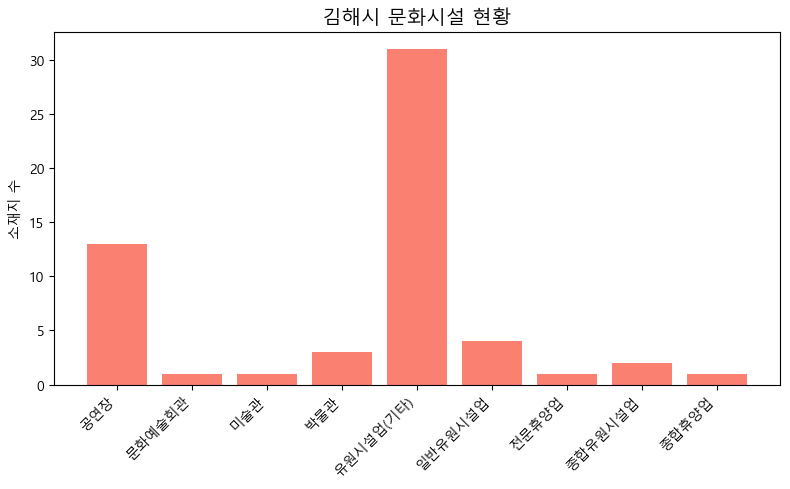

In [149]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
bars = plt.bar(culture_cnt['구분'], culture_cnt['소재지'], color='salmon')


# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
#              f'{int(height)}', ha='center', va='bottom', fontsize=9)


plt.title("김해시 문화시설 현황", fontsize=14)
plt.ylabel("소재지 수")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


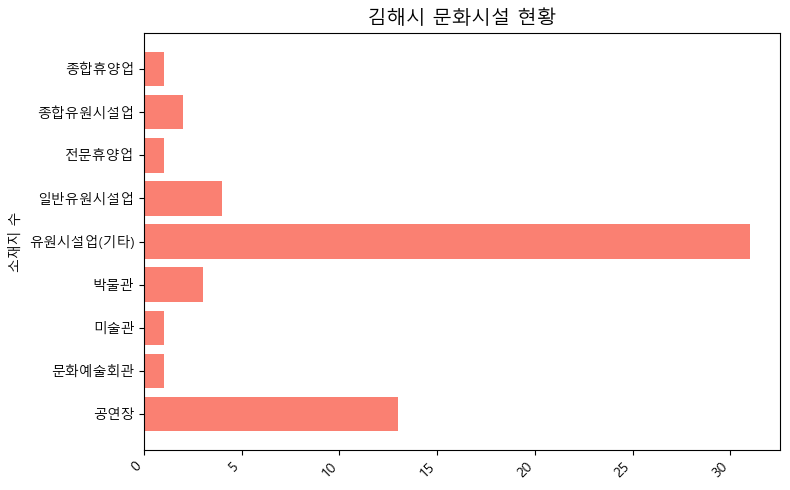

In [148]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(8, 5))
bars = plt.barh(culture_cnt['구분'], culture_cnt['소재지'], color='salmon')


# 그래프 설정
plt.title("김해시 문화시설 현황", fontsize=14)
plt.ylabel("소재지 수")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()